# Assignment 2

Weather data is from near Ann Arbor, Michigan, United States.

,Max Temp,Min Temp
Date,,
2005-01-01,156,-56
2005-01-02,139,-56
2005-01-03,133,0
2005-01-04,39,-39
2005-01-05,33,-94
...,...,...
2015-12-27,83,-6
2015-12-28,61,-39
2015-12-29,100,-39


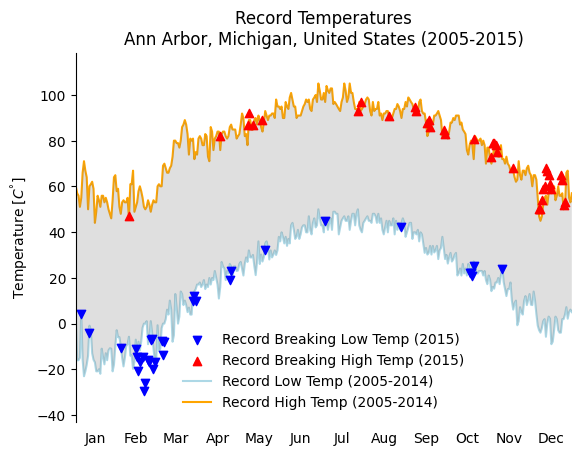

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

weather_df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

weather_df['Date'] = pd.to_datetime(weather_df['Date'])

weather_df = weather_df.sort_values(['ID','Date']).drop(['Element'], axis=1)
weather_df = weather_df.groupby(['ID','Date']).agg([np.max,np.min])
weather_df = weather_df['Data_Value'].rename(columns={'amax' : 'Max Temp', 'amin' : 'Min Temp'})
weather_df = weather_df.reset_index().groupby('Date').agg({'Max Temp' : np.max, 'Min Temp' : np.min,})

decade_df = weather_df[0:-365].drop(['2008-02-29','2012-02-29']).reset_index()

decade_df['Day of year']=decade_df['Date'].apply(lambda x: pd.to_datetime(x).day_of_year-1 if pd.to_datetime(x).year in [2008,2012] and pd.to_datetime(x).day_of_year>60 else pd.to_datetime(x).day_of_year)
days_df = decade_df.groupby('Day of year').agg({'Max Temp' : np.max, 'Min Temp' : np.min}).reset_index()
days=np.array(days_df['Day of year'].to_list())
MaxTemps=(np.array(days_df['Max Temp'].to_list())/10)*1.8+32
MinTemps=(np.array(days_df['Min Temp'].to_list())/10)*1.8+32

last_year_df = weather_df[-365:].reset_index()
last_year_df['Day of year']=pd.to_datetime(last_year_df['Date']).apply(lambda x: x.day_of_year)
last_year_max_df = last_year_df[last_year_df['Max Temp']>days_df['Max Temp']].drop('Min Temp',axis=1)
last_year_min_df = last_year_df[last_year_df['Min Temp']<days_df['Min Temp']].drop('Max Temp',axis=1)
daysmax2015 =np.array(last_year_max_df['Day of year'].to_list())
daysmin2015 = last_year_min_df['Day of year'].to_list()
MaxTemps2015=(np.array(last_year_max_df['Max Temp'].to_list())/10)*1.8+32
MinTemps2015=(np.array(last_year_min_df['Min Temp'].to_list())/10)*1.8+32

plt.figure()

plt.gca().set_prop_cycle(color=['lightblue','orange'])

plt.scatter(daysmin2015,MinTemps2015, c='b' , marker = 'v',zorder=2)
plt.scatter(daysmax2015,MaxTemps2015, c='r', marker = '^',zorder=2)


plt.plot(days,MinTemps,days,MaxTemps, zorder=1)



#plt.xlabel('Day of the Year')
plt.ylabel('Temperature $[C^{\degree}$]')
plt.xticks(np.array([15.5,45,74.5,105,135.5,166,196.5,227.5,258,288.5,319,349.5]), ('Jan', 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov', 'Dec'))
plt.title('Record Temperatures\nAnn Arbor, Michigan, United States (2005-2015)')

plt.tick_params(top=False, bottom=False, left=True, right=False, labelleft=True, labelbottom=True)

plt.margins(x=0,y=0.1)

plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.gca().spines.bottom.set_visible(False)

plt.legend(['Record Breaking Low Temp (2015)','Record Breaking High Temp (2015)' , 'Record Low Temp (2005-2014)','Record High Temp (2005-2014)' ], frameon=False)


plt.gca().fill_between(days, 
                       MinTemps, MaxTemps, 
                       facecolor='gray', 
                       alpha=0.25)

plt.savefig('weather_patterns.pdf')

weather_df
